# Wind Farm Layout Optimization problem

Sure, here's a simplified version of the  with the objective function and constraints defined:

### Objective Function:
Maximize the total energy production of the wind farm.

maximize: $\quad P = \sum_{i=1}^{N} P_i$

$\quad P_i = f(v) = $

where:
- $P$ is the total energy production of the wind farm.
- $P_i$ is the power output of wind turbine $i$.

### Assumptions and constraints:
1. All the wind turbines and their power curve functions are identical.
1. **Area constraint**:
   The layout of a wind farm is based on a 2-D coordinate system (x-axis and y-axis), and the search space is $S=[x_s,x_e]×[y_s,y_e]$,
   where $x_s$ and $x_e$ are the lower and upper bounds of x, respectively, and $y_s$ and $y_s$ are the lower and upper bounds of y, respectively.
   - Ensure that turbines are placed within the designated area:
     $$ x_i, y_i \in [0, L], \quad \forall i = 1, 2, ..., N $$
   - Where $ (x_i, y_i) $ are the coordinates of turbine $ i $ and $ L $ is the length of the wind farm area.

3. **Turbine Spacing Constraints**:
   - Maintain a minimum distance between turbines to prevent wake effects and ensure safety:
     $$ \text{Distance}(i, j) \geq D, \quad \forall i, j = 1, 2, ..., N, \ i \neq j $$
   - Where $ \text{Distance}(i, j) $ is the Euclidean distance between turbines $ i $ and $ j $, and $ D $ is the minimum required distance.
    There exists a minimum distance between any two wind turbines to ensure safety, which is set to five times of the rotor radius, i.e., 5R.
4. A wind turbine turns its nacelle to keep the rotor plane perpendicular to wind direction θ.


subject to
x+R ≤ xi ≤ x−R,
y+R ≤ yi ≤ y−R, (10)
(xi −xj)2 +(yi −yj)2 ≥ 5R, j = 1,2,...,N and j ̸= i.

In [ ]:
Wind Farm Area Size (L): 10 km x 10 km
Number of Turbines (N): 5
Minimum Turbine Spacing (D): 2 km

In [ ]:
To incorporate the power curve function $ f(v) $, which describes the relationship between the power output of wind turbine $ i $ and wind speed $ v $, into the objective function, we need to consider the power generated by each turbine based on the wind speed at its location. We can then sum up the total power generated by all turbines. Here's how we can formulate the modified objective function:

### Objective Function:
Maximize the total power generated by the wind farm.

$ \text{Maximize} \quad \sum_{i=1}^{N} f_i(v_i) $

Where:
- $ N $ is the number of turbines.
- $ f_i(v_i) $ represents the power output of turbine $ i $ at wind speed $ v_i $ according to its power curve function.
- $ v_i $ is the wind speed at the location of turbine $ i $.
- The objective is to maximize the total power generated by all turbines, taking into account the power curve function $ f(v) $ for each turbine.

For the Wind Farm Layout Optimization problem with land and turbine spacing constraints, we'll formulate the problem to maximize the total energy production while ensuring that turbines are placed within the designated land area and comply with minimum spacing requirements. Here's the formulation:

### Objective Function:
Maximize the total energy production of the wind farm.

$ \text{Maximize} \quad E = \sum_{i=1}^{N} E_i $

Where:
- $ E $ is the total energy production of the wind farm.
- $ E_i $ is the energy produced by turbine $ i $, which is a function of its location and wind conditions.

### Constraints:
1. **Land Use Constraints**:
   - Ensure that turbines are placed within the designated land area:
     $ x_i, y_i \in [0, L], \quad \forall i = 1, 2, ..., N $
   - Where $ (x_i, y_i) $ are the coordinates of turbine $ i $ and $ L $ is the length of the wind farm area.

2. **Turbine Spacing Constraints**:
   - Maintain a minimum distance between turbines to prevent wake effects and ensure safety:
     $ \text{Distance}(i, j) \geq D, \quad \forall i, j = 1, 2, ..., N, \ i \neq j $
   - Where $ \text{Distance}(i, j) $ is the Euclidean distance between turbines $ i $ and $ j $, and $ D $ is the minimum required distance.

### Variables:
- $ x_i, y_i $ are decision variables representing the coordinates of turbine $ i $.
- $ N $ is the number of turbines.

### Objective:
- Maximize the total energy production $ E $ by optimizing the placement of turbines within the designated land area while satisfying the minimum spacing constraints.

This formulation ensures that the wind farm layout is optimized to maximize energy production while complying with land use and turbine spacing constraints. Optimization algorithms can be used to solve this problem and determine the optimal placement of turbines within the wind farm area.

In [242]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [243]:
# set figsize and dpi for all figures
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["figure.dpi"] = 90

In [244]:
def determine_num_bits(max_coordinate):
    """Calculate the number of bits required to represent the maximum coordinate value."""
    num_bits = math.ceil(math.log2(max_coordinate))
    return num_bits


def encode_position_to_binary(x, y, num_bits):
    """Encode the (x, y) coordinates to a binary string."""
    x_binary = format(x, '0' + str(num_bits) + 'b')
    y_binary = format(y, '0' + str(num_bits) + 'b')
    binary_string = x_binary + y_binary
    return binary_string


def decode_binary_to_position(binary_string, num_bits):
    """Decode the binary string to (x, y) coordinates."""
    x_binary = binary_string[:num_bits]
    y_binary = binary_string[num_bits:]
    x = int(x_binary, 2)
    y = int(y_binary, 2)
    return x, y

In [245]:
def euclidean_distance(pos1, pos2):
    return math.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)


def is_valid_spacing(pos1, pos2, min_spacing):
    """Check if turbines at the positions satisfy the minimum spacing constraint."""
    return euclidean_distance(pos1, pos2) >= min_spacing


def is_position_within_bounds(position, area_size):
    """Check if a position is within the bounds of the specified area."""
    x, y = position
    return 0 <= x < area_size and 0 <= y < area_size


def is_layout_valid(layout, area_size, min_spacing):
    """Check if the entire layout satisfies the minimum spacing constraint and is within the bounds of the specified area."""
    for i, pos1 in enumerate(layout):
        if not is_position_within_bounds(pos1, area_size):
            return False
        for pos2 in layout[i+1:]:
            if not is_valid_spacing(pos1, pos2, min_spacing):
                return False
    return True


def initialize_population(population_size, n_turbines, area_size, min_spacing, max_attempts=100):
    """
    Generate random turbine layouts with each turbine within the land area and satisfying spacing constraints.

    Parameters:
        population_size (int): Number of individuals in the population.
        n_turbines (int): Number of turbines (N).
        area_size (int): Size of the land area (assuming a square area) (L).
        min_spacing (float): Minimum spacing between turbines (D).
        max_attempts (int): Maximum number of attempts to find a valid position for a new turbine.

    Returns:
        list: A list of turbine layouts, where each layout is represented as a list of (x, y) coordinates.
    """
    initial_population = []
    max_coordinate = area_size # - min_spacing
    num_bits = determine_num_bits(area_size)
    
    for _ in range(population_size):
        layout = []
        for _ in range(n_turbines):
            x = random.randint(0, max_coordinate)
            y = random.randint(0, max_coordinate)

            attempts = 0
            while attempts < max_attempts:
                x = random.randint(0, max_coordinate)
                y = random.randint(0, max_coordinate)

                is_new_possition_valid = True
                for pos in layout:
                    if not is_valid_spacing(pos, (x, y), min_spacing):
                        is_new_possition_valid = False
                        break
                if is_new_possition_valid:
                    layout.append((x,y))
                    break
                attempts += 1
            else:
                raise RuntimeError("Maximum attempts reached without finding a valid position.")

        encoded_layout = [encode_position_to_binary(pos[0], pos[1], num_bits) for pos in layout]
        initial_population.append(encoded_layout)
    
    return initial_population

In [246]:
def plot_turbine_layout(coordinates):
    """Plot the turbine layout based on the given coordinates."""
    x_coordinates = [coord[0] for coord in coordinates]
    y_coordinates = [coord[1] for coord in coordinates]
    plt.figure()
    plt.scatter(x_coordinates, y_coordinates, marker='x', color='b')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Turbine Layout')
    plt.grid(True)
    plt.show()


def plot_population_layouts(population):
    """Plot the turbine layouts of the entire population, with each layout represented in a different color on the same chart."""
    plt.figure()
    for i, layout in enumerate(population):
        x_coordinates = [coord[0] for coord in layout]
        y_coordinates = [coord[1] for coord in layout]
        plt.scatter(x_coordinates, y_coordinates, marker='x', label=f'Layout {i+1}')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Turbine Layouts of Population')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.show()

chromosome 1: ['1011101010100011100111', '0110000000110111010000', '0100001111101110010101', '0011101000100000111010', '0100000010101000101001']
chromosome 2: ['1000001001010001001001', '0100010010000100111000', '0000110101000110011011', '0011000000010011000111', '1001100110001000110000']
chromosome 3: ['1010011100010100011011', '0010110111101000111110', '1011100110110000110000', '0010001010010100011110', '0100111001000011111111']
chromosome 4: ['1011000110000110101100', '0001000001100101010101', '0011010100110011100010', '1010100101001101111001', '0101001011100000010110']
chromosome 5: ['0001100100101101010100', '1010111010110100110011', '1010001010000001101110', '1000000101001111111001', '0000101110000011100110']


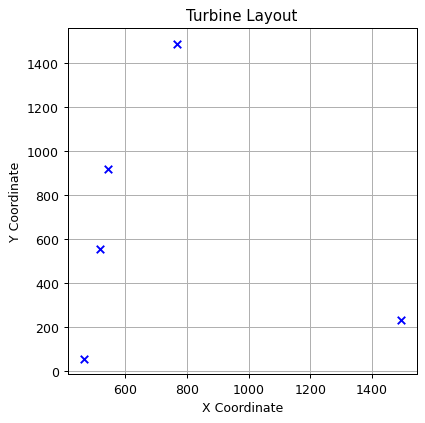

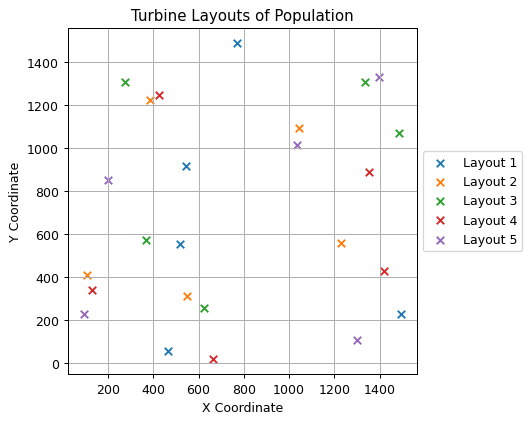

[(1135, 98), (649, 11), (1253, 983), (197, 823), (303, 114)]

In [247]:
# Test
population_size = 5
area_size = 1500
minimum_spacing = 200
n_turbines  = 5
num_bits = determine_num_bits(area_size)

population = initialize_population(population_size, n_turbines, area_size, minimum_spacing)
for idx, layout in enumerate(population):
    print(f"chromosome {idx + 1}: {layout}")
    
population_decoded = [[decode_binary_to_position(pos, num_bits) for pos in layout] for layout in population]
plot_turbine_layout(population_decoded[0])
plot_population_layouts(population_decoded)
positions

In [248]:
def power_output(turbine_coordinates, wind_speed):
    """
    Calculate the energy production for a single turbine based on its position and wind speed.
    #AEP

    Parameters:
        turbine_coordinates (tuple): Tuple containing the (x, y) coordinates of the turbine.
        wind_speed (float): Wind speed at the turbine location.

    Returns:
        float: Energy production for the turbine.
    """
    # alpha = 0.5
    # beta = 0.03
    P_r = 3.35  # Rated turbine power output [MW]
    v_ci = 4.0  #  Cut-in wind speed [m/s]
    v_r = 9.8  # Rated wind speed [m/s]
    v_co = 25.0  #  Cut-out wind speed [m/s]

    # TMP
    if turbine_coordinates[1]:
        wind_speed *= turbine_coordinates[0] / turbine_coordinates[1]
    
    if wind_speed < v_ci or wind_speed >= v_co:
        return 0
    elif wind_speed < v_r:
        return P_r * ((wind_speed - v_ci) / (v_r - v_ci)) ** 3
    else:
        return P_r 



def calculate_layout_energy_production(layout, wind_speed):
    """Calculate the energy production for turbine layout."""    
    total_energy = sum((power_output(coordinates, wind_speed) for coordinates in layout))
    return total_energy


def evaluate_fitness(population, area_size, min_spacing, wind_speed):
    """
    Calculate the fitness (total energy production) for each candidate solution in the population.

    Parameters:
        population (list): List of turbine layouts, where each layout is represented as a list of (x, y) coordinates.
        area_size (int): Size of the land area (assuming a square area) (L).
        min_spacing (float): Minimum spacing between turbines (D).
        wind_speed (float): Wind speed at the turbine location. (V)

    Returns:
        list: List of fitness values for each candidate solution in the population.
    """
    fitness_values = []
    for layout in population:
        total_energy = 0
        if is_layout_valid(layout, area_size, min_spacing):
            total_energy = calculate_layout_energy_production(layout, wind_speed)
        fitness_values.append(total_energy)
    
    return fitness_values


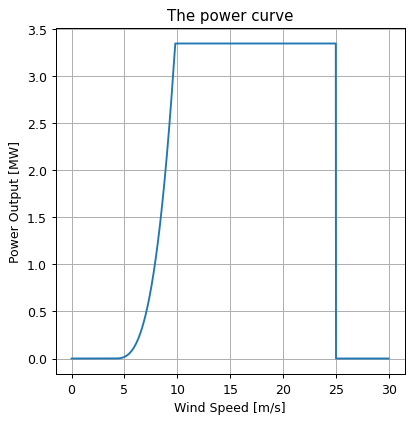

In [249]:
x = np.arange(0, 30, 0.01)
y = [power_output((500,0), wind_speed) for wind_speed in x]
plt.figure()
plt.plot(x, y)
plt.title('The power curve')
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('Power Output [MW]')
plt.grid(True)
plt.show()

In [250]:
def tournament_selection(population, tournament_size):
    pass


def selection(population, fitness_values):
    """Perform selection of individuals from the population based on their fitness values."""
    total_fitness = sum(fitness_values)
    probabilities = [fitness / total_fitness for fitness in fitness_values] if total_fitness else []

    selected_population = []
    for _ in range(len(population)):
        selected_individual = roulette_wheel_select(population, probabilities)
        selected_population.append(selected_individual)

    return selected_population


def roulette_wheel_select(population, probabilities):
    """Perform roulette wheel selection to select an individual from the population based on probabilities."""
    spin = random.random()
    cumulative_probability = 0
    for individual, probability in zip(population, probabilities):
        cumulative_probability += probability
        if spin <= cumulative_probability:
            return individual

In [251]:
def plot_roulette_wheel(probabilities):
    """Plot a roulette wheel to visualize the selection probabilities."""
    fig, ax = plt.subplots()
    ax.axis('equal')
    wedges, texts, autotexts = ax.pie(probabilities, startangle=90, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
    labels = ['Layout {}'.format(i+1) for i in range(len(probabilities))]
    ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
    ax.set_title('Roulette Wheel Selection Probabilities')
    plt.show()

Fitness values: [8.704471220073108, 0.1114913036180186, 5.890541174893777, 7.211511317807916, 8.203688627918845]


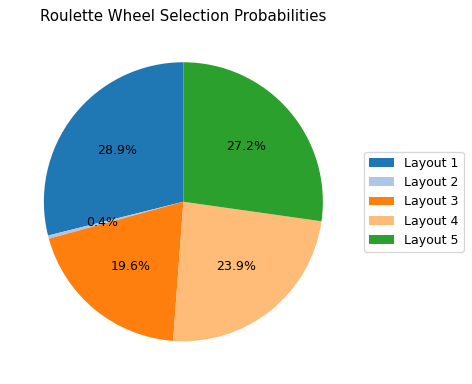

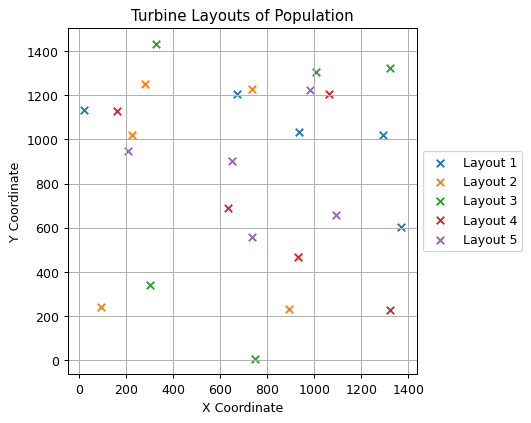

In [252]:
# Test
population_size = 5
n_turbines  = 5
area_size = 1500
min_spacing = 200
num_bits = determine_num_bits(area_size)

population = initialize_population(population_size, n_turbines, area_size, min_spacing)
population_decoded = [[decode_binary_to_position(pos, num_bits) for pos in layout] for layout in population]
fitness_values = evaluate_fitness(population_decoded, area_size, min_spacing, wind_speed=9.8)
print("Fitness values:", fitness_values)

total_fitness = sum(fitness_values)
probabilities = [fitness / total_fitness for fitness in fitness_values] if total_fitness else []

plot_roulette_wheel(probabilities)
plot_population_layouts(population_decoded)

In [292]:
def onepoint_crossover(parents):
    """Perform crossover to create offspring from parent individuals using single-point crossover."""
    offspring = []
    for i in range(0, len(parents) - 1, 2):
        parent1 = parents[i]
        parent2 = parents[i+1]

        crossover_point = random.randint(1, len(parent1) - 1)
        offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
        offspring2 = parent2[:crossover_point] + parent1[crossover_point:]

        offspring.append(offspring1)
        offspring.append(offspring2)
    return offspring


def twopoint_crossover(parents):
    """Perform crossover to create offspring from parent individuals using two-point crossover."""
    offspring = []
    for i in range(0, len(parents) - 1, 2):
        parent1 = parents[i]
        parent2 = parents[i+1]

        cut_spot_1 = random.randint(1, len(parent1) - 1)
        cut_spot_2 = random.randint(1, len(parent1) - 1)
        offspring1 = parent1[:cut_spot_1] + parent2[cut_spot_1:cut_spot_2] + parent1[cut_spot_2:]
        offspring2 = parent2[:cut_spot_1] + parent1[cut_spot_1:cut_spot_2] + parent2[cut_spot_2:]

        offspring.append(offspring1)
        offspring.append(offspring2)
    return offspring

In [289]:
def mutation(offspring, mutation_rate):
    """Perform mutation on offspring individuals with a given mutation rate."""
    mutated_offspring = []
    for individual in offspring:
        mutated_individual = ''
        for gene in individual:
            if random.random() < mutation_rate:
                mutated_gene = '0' if gene == '1' else '1'
            else:
                mutated_gene = gene
            mutated_individual += mutated_gene
        mutated_offspring.append(mutated_individual)
    return mutated_offspring


def replacement(population, offspring, fitness_values, next_population_size=population):
    """Perform replacement to select individuals for the next generation based on fitness values."""
    combined_population = population + offspring
    combined_population_sorted = [x for _, x in sorted(zip(fitness_values, combined_population), reverse=True)]
    next_generation_population = combined_population_sorted[:len(next_population_size)]
    return next_generation_population

In [294]:
    
def genetic_algorithm(ga_config):
    """Run the genetic algorithm"""

    n_turbines = ga_config['n_turbines']
    area_size = ga_config['area_size']
    min_spacing = ga_config['min_spacing']
    max_attempts = ga_config['max_attempts']
    wind_speed = ga_config['wind_speed']
    population_size = ga_config['population_size']
    mutation_rate = ga_config['mutation_rate']
    max_generations = ga_config['max_generations']
    max_stagnation = ga_config['max_stagnation']


    best_result = [-1, float('-inf')]
    stagnation_counter = 0
    
    num_bits = determine_num_bits(area_size)
    population = initialize_population(population_size, n_turbines, area_size, min_spacing, max_attempts)
    
    # main GA loop
    for generation in range(max_generations):
        
        population_decoded = [[decode_binary_to_position(pos, num_bits) for pos in layout] for layout in population]
        fitness_values = evaluate_fitness(population_decoded, area_size, min_spacing, wind_speed)

        # Check for stagnation
        current_best_result = max(zip(fitness_values, range(len(fitness_values))))
        print('current_best_result', current_best_result)
        if current_best_result[1] < best_result[1]:
            best_result = current_best_value
            print(f'    Generation {generation} best result {best_result[1]}')
            stagnation_counter = 0
        else:
            stagnation_counter += 1

        if stagnation_counter >= max_stagnation:
            print(f"Terminating due to stagnation at generation {generation}.")
            break

        # Next population
        selected_parents = selection(population, fitness_values)
        offspring = onepoint_crossover(selected_parents)
        mutated_offspring = mutation(offspring, mutation_rate)
        population = replacement(population, mutated_offspring, fitness_values)

    if generation == max_generations - 1:
        print(f"Terminating due to reaching maximum of {generation} generations.")

    best_layout = population[best_result[0]]
    best_layout_pos = [decode_binary_to_position(pos, num_bits) for pos in best_layout]
    print(f"Best result found: P={best_result[1]}MW")
    print(f"Best turbines layout found: {best_layout_pos}")
    plot_turbine_layout(best_layout_pos)

current_best_result (36.85000000000001, 283)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_best_result (36.85000000000001, 0)
current_b

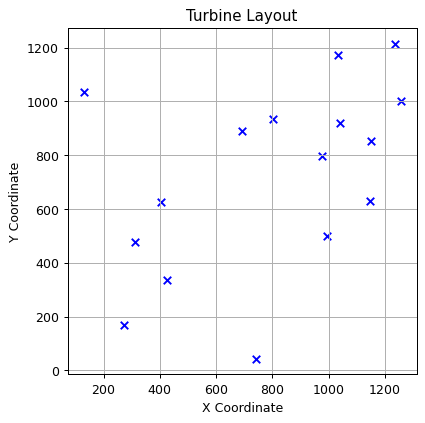

In [295]:
# Parameters:
#     population_size (int): Number of individuals in the population.
#     n_turbines (int): Number of turbines (N).
#     area_size (int): Size of the land area in meters (assuming a square area) (L).
#     min_spacing (float): Minimum spacing between turbines (D). No turbine can be less than two rotor diameters from any other turbine [m].
#     max_attempts (int): Maximum number of attempts to find a valid position for a new turbine.

ga_config = {
    'n_turbines': 16,
    'area_size': 1300,
    'min_spacing': 100,
    'max_attempts': 100,
    'wind_speed': 9.8,
    'population_size': 1000,
    'mutation_rate': 0.1,
    'max_generations': 50, 
    'max_stagnation': 50, 
}


if __name__ == '__main__':
    genetic_algorithm(ga_config)